**Nous utilisons pas encore le GPU, il ne faut pas changer le runtime**

## **Exercice 1 : Classification linéaire**

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

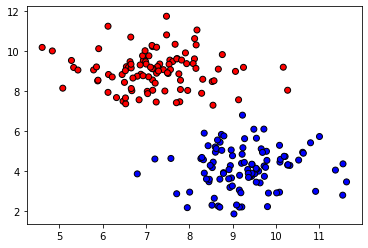

In [43]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')

In [44]:
import torch
import torch.nn as nn
import numpy as np
from random import randrange
import torch.optim as optim
## Créez les layers ici 
layer1 = nn.Linear(2, 3)
layer2 = nn.Linear(3, 2)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03
num_iter = 500

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Procédure de training cad 
# 1) boucle d'entrainement avec création de batch aléatoirement 
# 2) prediction du reseau (forward pass) 
# 3) calcul de la loss 
# 4) rétropropagation du gradient 
# 5) tracking de la training loss
# 6) Si vous avez une bonne training loss, vous utilisez break

for i in range(num_iter):
  batch_x = []
  batch_y = []
  for j in range(batch_size):
    random_index = randrange(len(X_train))
    batch_x.append(np.array(X_train[random_index]))
    batch_y.append(np.array(y_train[random_index]))
  
  batch_x_tensor = torch.from_numpy(np.array(batch_x, dtype=np.float32))
  batch_y_tensor = torch.from_numpy(np.array(batch_y))
  optimizer.zero_grad()
  out = layer1(batch_x_tensor)
  out = layer2(out)
  loss = loss_func(out, batch_y_tensor)
  loss.backward()
  optimizer.step()
  print('\r Step', i , ':' , str(loss.data.cpu().numpy()), end="")

# Quand le modèle a convergé, on calcule l'accuracy sur le test
# ne pas utiliser de fonction sklearn, calculez l'accuracy vous même avec np.argmax
out = layer1(torch.from_numpy(np.array(X_test, dtype=np.float32)))
out = layer2(out)
best = np.argmax(out.data.cpu().numpy(), axis=-1)
print('\n Accuracy is ' , str(np.mean(best == y_test)*100))

 Step 499 : 0.007706144
 Accuracy is  100.0


## **Exercice 2 : Classification non-linéaire**

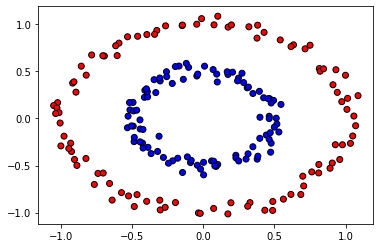

In [39]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()


In [40]:
# Modifiez votre reseau (la couche intermédiaire) pour obtenir 100% sur ce dataset


## Créez les layers ici 
layer1 = nn.Linear(2, 4)
layer2 = nn.Linear(4, 2)
tanh = nn.Tanh()
# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03
num_iter = 10000

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for i in range(num_iter):
  batch_x = []
  batch_y = []
  for j in range(batch_size):
    random_index = randrange(len(X_train))
    batch_x.append(np.array(X_train[random_index]))
    batch_y.append(np.array(y_train[random_index]))
  
  batch_x_tensor = torch.from_numpy(np.array(batch_x, dtype=np.float32))
  batch_y_tensor = torch.from_numpy(np.array(batch_y))
  optimizer.zero_grad()
  out = layer1(batch_x_tensor)
  out = tanh(out)
  out = layer2(out)
  loss = loss_func(out, batch_y_tensor)
  loss.backward()
  optimizer.step()
  print('\r Step', i , ':' , str(loss.data.cpu().numpy()), end="")


out = layer1(torch.from_numpy(np.array(X_test, dtype=np.float32)))
out = tanh(out)
out = layer2(out)
best = np.argmax(out.data.cpu().numpy(), axis=-1)
print('\n Accuracy is ' , str(np.mean(best == y_test)*100))

 Step 9999 : 0.039358955
 Accuracy is  100.0


## **Exercice 3 : Network class**

Vous allez recoder l'exercice 2 en ajoutant deux modifications: <br/>
1)
Pour l'instant, on traite nos couches séparément, et non comme un "block" unifié. Par exemple, il faut donner les parametres de chaque couche a l'optimizer (par exemple : `optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate`)

Allez sur ce lien et regardez comment définir une classe pour votre réseau (https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html). Utilisez la et modifiez votre ligne de l'optimiseur ainsi que la gestion de votre forward pass.

2)
Imaginez qu'on ait 1000 couches, ce n'est pas pratique des les appeler une par une lors de la forward pass. Utilisez la fonction suivante pour palier au problème :
https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html

In [41]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.ModuleList([nn.Linear(2, 4),
                              nn.Tanh(),
                              nn.Linear(4, 2)])
  def forward(self, x):
    for module in self.net:
      x = module(x)
    return x

net = Network()
# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03
num_iter = 10000

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for i in range(num_iter):
  batch_x = []
  batch_y = []
  for j in range(batch_size):
    random_index = randrange(len(X_train))
    batch_x.append(np.array(X_train[random_index]))
    batch_y.append(np.array(y_train[random_index]))
  
  batch_x_tensor = torch.from_numpy(np.array(batch_x, dtype=np.float32))
  batch_y_tensor = torch.from_numpy(np.array(batch_y))
  optimizer.zero_grad()
  out = net(batch_x_tensor)
  loss = loss_func(out, batch_y_tensor)
  loss.backward()
  optimizer.step()
  print('\r Step', i , ':' , str(loss.data.cpu().numpy()), end="")



out = net(torch.from_numpy(np.array(X_test, dtype=np.float32)))
best = np.argmax(out.data.cpu().numpy(), axis=-1)
print('\n Accuracy is ' , str(np.mean(best == y_test)*100))

 Step 9999 : 0.04274232
 Accuracy is  100.0


## **Exercice 4 : Dataloader**

En général, il est compliqué de créer soi même ses batchs, surtout si le dataset devient complexe. Nous allons utiliser un dataloader de pytorch, qui lui même crée les batch. Lisez **seulement la section "dataset" de cette ressource** :https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel#dataset et créer votre classe dataset. Voici une esquisse de code pour vous aider

In [35]:
import torch

X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)


class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.ModuleList([nn.Linear(2, 4),
                              nn.Tanh(),
                              nn.Linear(4, 2)])
  def forward(self, x):
    for module in self.net:
      x = module(x)
    return x

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, y):
        self.X = X
        self.y = y

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select one sample at position index
        # Return in type : np.array
        x = np.array(self.X[index], dtype=np.float32)
        y = np.array(self.y[index])
        return x, y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

training_generator = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_generator = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

print('Train set length', len(train_dataset))
print('Test set length', len(test_dataset))

net = Network()
# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03
num_epochs = 1000 # epoch = 1 tour sur chaque donnée
# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)


for i in range(num_epochs):
  for j, sample in enumerate(training_generator):
    x, y = sample # Generator automatically transform it to tensor
    optimizer.zero_grad()
    out = net(x)
    loss = loss_func(out, y)
    loss.backward()
    optimizer.step()
    print('\r Epoch', i, 'Step', j , ':' , str(loss.data.cpu().numpy()), end="")


accuracy = []
for j, sample in enumerate(test_generator):
  x, y = sample # Generator automatically transform it to tensor
  out = net(x)
  best = np.argmax(out.data.cpu().numpy(), axis=-1)
  accuracy.extend(list(best == y.data.cpu().numpy()))
print('\n Accuracy is ' , str(np.mean(accuracy)*100))


Train set length 100
Test set length 100
 Epoch 499 Step 9 : 0.15207544
 Accuracy is  100.0
